# Parse
Notebook for testing Parse class in parse.py

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from matplotlib.animation import FuncAnimation, PillowWriter
from parse import Parse
from pprint import pprint
from eagartsai import EagarTsai
from tqdm import tqdm

In [2]:
p = Parse("3DBenchy.gcode")

In [3]:
layer_index = 10
start_index = 0
end_index = -1 

In [4]:
print(p.layers_eagar_tsai[layer_index][start_index:end_index])

[{'prev_coordinate': {'X': 74.236, 'Y': 96.921}, 'coordinate': {'X': 80.335, 'Y': 103.521}, 'angle': 0.8248296394650853, 'dist': 8.986534426574007, 'travel': False}, {'prev_coordinate': {'X': 80.335, 'Y': 103.521}, 'coordinate': {'X': 79.783, 'Y': 103.521}, 'angle': 3.141592653589793, 'dist': 0.5519999999999925, 'travel': False}, {'prev_coordinate': {'X': 79.783, 'Y': 103.521}, 'coordinate': {'X': 81.983, 'Y': 101.321}, 'angle': -0.7853981633974483, 'dist': 3.111269837220813, 'travel': False}, {'prev_coordinate': {'X': 81.983, 'Y': 101.321}, 'coordinate': {'X': 81.983, 'Y': 100.769}, 'angle': -1.5707963267948966, 'dist': 0.5519999999999925, 'travel': False}, {'prev_coordinate': {'X': 81.983, 'Y': 100.769}, 'coordinate': {'X': 79.231, 'Y': 103.521}, 'angle': 2.3561944901923475, 'dist': 3.891915723650761, 'travel': False}, {'prev_coordinate': {'X': 79.231, 'Y': 103.521}, 'coordinate': {'X': 78.678, 'Y': 103.521}, 'angle': 3.141592653589793, 'dist': 0.5529999999999973, 'travel': False}, {

In [5]:
print(len(p.layers_eagar_tsai[layer_index]))
print(len(p.layers_parameterized[layer_index]))

307
297


In [6]:
pprint(p.layers_eagar_tsai[layer_index][start_index:end_index])

[{'angle': 0.8248296394650853,
  'coordinate': {'X': 80.335, 'Y': 103.521},
  'dist': 8.986534426574007,
  'prev_coordinate': {'X': 74.236, 'Y': 96.921},
  'travel': False},
 {'angle': 3.141592653589793,
  'coordinate': {'X': 79.783, 'Y': 103.521},
  'dist': 0.5519999999999925,
  'prev_coordinate': {'X': 80.335, 'Y': 103.521},
  'travel': False},
 {'angle': -0.7853981633974483,
  'coordinate': {'X': 81.983, 'Y': 101.321},
  'dist': 3.111269837220813,
  'prev_coordinate': {'X': 79.783, 'Y': 103.521},
  'travel': False},
 {'angle': -1.5707963267948966,
  'coordinate': {'X': 81.983, 'Y': 100.769},
  'dist': 0.5519999999999925,
  'prev_coordinate': {'X': 81.983, 'Y': 101.321},
  'travel': False},
 {'angle': 2.3561944901923475,
  'coordinate': {'X': 79.231, 'Y': 103.521},
  'dist': 3.891915723650761,
  'prev_coordinate': {'X': 81.983, 'Y': 100.769},
  'travel': False},
 {'angle': 3.141592653589793,
  'coordinate': {'X': 78.678, 'Y': 103.521},
  'dist': 0.5529999999999973,
  'prev_coordinate

In [7]:
# pprint(p.layers_parameterized[layer_index][start_index:end_index])

[0.08033499999999999, 0.103521]
80.335
103.521


 24%|██▍       | 73/306 [02:14<07:33,  1.95s/it]

KeyboardInterrupt: 

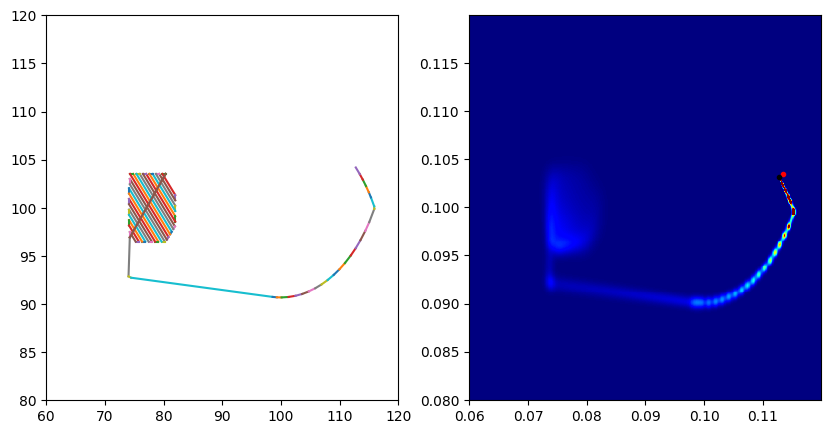

In [8]:
bounds = {
    "x": [0.06, 0.12],
    "y": [0.08, 0.12],
    "z": [-800e-6, 0]
}


layer_eagar_tsai = p.layers_eagar_tsai[layer_index][start_index:end_index]
layer_parameterized = p.layers_parameterized[layer_index][start_index:end_index]

first_location = [layer_eagar_tsai[0]["coordinate"]["X"]/1000, layer_eagar_tsai[0]["coordinate"]["Y"]/1000]

print(first_location)
print(layer_parameterized[0][0]["X"])
print(layer_parameterized[0][0]["Y"])

et = EagarTsai(0.0001, bc = "temp", bounds=bounds, location = first_location)
# et = EagarTsai(0.0001, bc = "temp", bounds=bounds)

velocity = 800 # mm/s

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

def update(index):

    line = layer_eagar_tsai[index]

    dt = line["dist"] / velocity
    power = 200

    if not line["travel"]:
        ax[0].set_xlim(60, 120)
        ax[0].set_ylim(80, 120)
        x = [line["prev_coordinate"]["X"], line["coordinate"]["X"]]
        y = [line["prev_coordinate"]["Y"], line["coordinate"]["Y"]]
        ax[0].plot(x, y)
    
    else:
        power = 0

    if (index > 0):
        et.forward(dt, line["angle"], power)

        ax[1].clear()
        ax[1].pcolormesh(et.xs, et.ys, et.theta[:, :, -1].T, cmap = 'jet', vmin = 300, vmax = 1923)
        ax[1].plot(et.location[0], et.location[1] ,'r.')
        ax[1].plot(et.xs[et.location_idx[0]], et.ys[et.location_idx[1]], 'k.')

animate = FuncAnimation(fig, update, frames=tqdm(range(len(layer_eagar_tsai))))

animate.save(f"eagar_tsai_layer_index_{layer_index}.gif", writer=PillowWriter(fps=20))


/tmp/ipykernel_328642/3108986505.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  pcm = ax.scatter([], [], cmap = 'jet', vmin = 300, vmax = 1923)


[0.08033499999999999, 0.103521]
80.335
103.521
0.08030000000000058 0.10350000000000067
[203, 235] [0.08033499999999999, 0.103521]























































































  2%|▏         | 6/306 [01:15<1:02:39, 12.53s/it]



































































































































































































































































































































































































































































































































































































































































































































































































































































































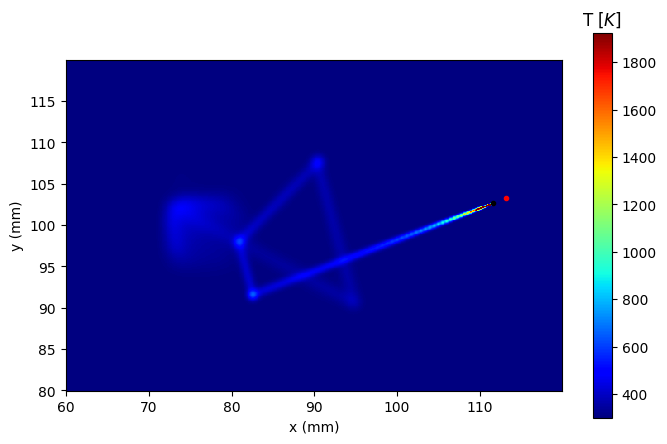

In [27]:
bounds = {
    "x": [0.06, 0.12],
    "y": [0.08, 0.12],
    "z": [-800e-6, 0]
}


layer_eagar_tsai = p.layers_eagar_tsai[layer_index][start_index:end_index]
layer_parameterized = p.layers_parameterized[layer_index][start_index:end_index]

first_location = [layer_eagar_tsai[0]["coordinate"]["X"]/1000, layer_eagar_tsai[0]["coordinate"]["Y"]/1000]

print(first_location)
print(layer_parameterized[0][0]["X"])
print(layer_parameterized[0][0]["Y"])

et = EagarTsai(0.0001, bc = "temp", bounds=bounds, location = first_location)
# et = EagarTsai(0.0001, bc = "temp", bounds=bounds)

velocity = 800 # mm/s

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

pcm = ax.scatter([], [], cmap = 'jet', vmin = 300, vmax = 1923)
clb = fig.colorbar(pcm, ax = ax)
clb.ax.set_title(r'T [$K$]')

def update(index):

    line = layer_eagar_tsai[index]

    dt = line["dist"] / velocity
    power = 200
    
    if line["travel"]:
        power = 0

    if (index > 0):
        et.forward(dt, line["angle"], power)

        ax.clear()
        scale_x = 1e-3
        scale_y = 1e-3
        ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
        ticks_y = ticker.FuncFormatter(lambda y, pos:'{0:g}'.format(y/scale_y) )
        c = ax.pcolormesh(et.xs, et.ys, et.theta[:, :, -1].T, cmap = 'jet', vmin = 300, vmax = 1923)
        ax.set_aspect('equal')
        ax.xaxis.set_major_formatter(ticks_x)
        ax.yaxis.set_major_formatter(ticks_y)
        ax.set_xlabel(r"x (mm)")
        ax.set_ylabel(r"y (mm)")
        ax.plot(et.location[0], et.location[1] ,'r.')
        ax.plot(et.xs[et.location_idx[0]], et.ys[et.location_idx[1]], 'k.')

        clb.update_normal(c)

animate = FuncAnimation(fig, update, frames=tqdm(range(len(layer_eagar_tsai))))

animate.save(f"eagar_tsai_only_layer_index_{layer_index}.gif", writer=PillowWriter(fps=20))


In [ ]:
et = EagarTsai(20e-6, bc = "temp")

layer_eagar_tsai = p.layers_eagar_tsai[layer_index]

velocity = 800 # mm/s

for line in layer_eagar_tsai[start_index:end_index]:
    distance = line["dist"]
    if distance > 0:
        dt = line["dist"] / velocity
        print(dt)
        power = 200
        if (line["travel"]):
            power = 0
        et.forward(dt, line["angle"], power)

et.plot()


0.0 0.0
[0, 0] [0, 0]
0.0015111424692927028
0.001495296793282187
0.0014841122135808905
0.0014772361227982436
0.0014676304243575761
0.0014612842168791203
0.0014562666308063255
0.0014893727706655508
0.0014077891576866329
0.0014832755138543807
0.0016142771215005253
0.001443479411872577
0.0014832618194371336
0.0016189821262138813


KeyboardInterrupt: 

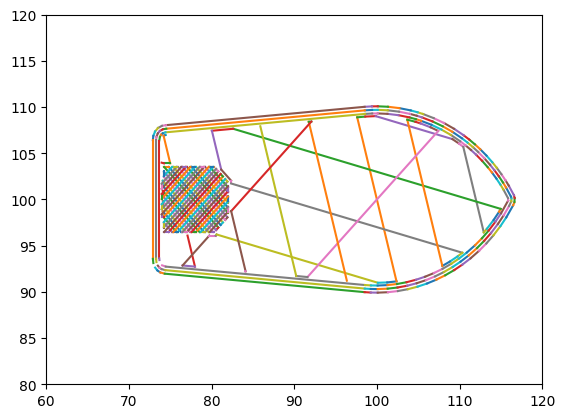

In [11]:
p.animate_layer(layer_index, start_index, end_index)

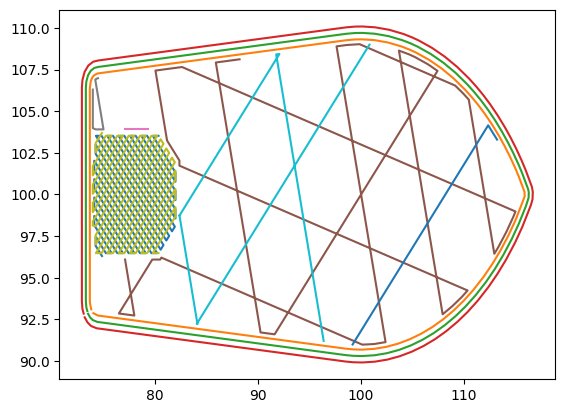

In [10]:
p.plot_layers(layer_index, layer_index + 1)